## RNN Project 
#### Ryan Slipe
#### Grand Canyon University
#### DSC-550-O500
#### 11/14/2023

In [233]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

## Importing and Cleaning the Data

In [538]:
# import the data
df = pd.read_csv("C:/Users/ryans/Documents/Neural Netwoks-Deep Learning/LSTM/apple/AAPL.csv")

In [320]:
df22 = df.copy()

In [235]:
# view first 5 rows
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [237]:
# change date column to be the date time
df['Date'] = pd.to_datetime(df['Date'])


In [238]:
# check data types
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [239]:
# check for null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10468 non-null  datetime64[ns]
 1   Open       10468 non-null  float64       
 2   High       10468 non-null  float64       
 3   Low        10468 non-null  float64       
 4   Close      10468 non-null  float64       
 5   Adj Close  10468 non-null  float64       
 6   Volume     10468 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 572.6 KB


In [240]:
# check statistics 
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,10468,10468.000000,10468.000000,10468.000000,10468.000000,10468.000000,1.046800e+04
mean,2001-09-07 05:59:43.492548608,14.757987,14.921491,14.594484,14.763533,14.130431,3.308489e+08
min,1980-12-12 00:00:00,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00
25%,1991-04-21 06:00:00,0.283482,0.289286,0.276786,0.283482,0.235462,1.237768e+08
50%,2001-08-28 12:00:00,0.474107,0.482768,0.465960,0.475446,0.392373,2.181592e+08
75%,2012-01-25 06:00:00,14.953303,15.057143,14.692589,14.901964,12.835269,4.105794e+08
max,2022-06-17 00:00:00,182.630005,182.940002,179.119995,182.009995,181.511703,7.421641e+09
std,NaN,31.914174,32.289158,31.543959,31.929489,31.637275,3.388418e+08


In [241]:
# Work with the closing prices
data = df[['Date', 'Close']]

In [242]:
# view first 5 rows
data.head()

,Date,Close
0,1980-12-12,0.128348
1,1980-12-15,0.121652
2,1980-12-16,0.112723
3,1980-12-17,0.115513
4,1980-12-18,0.118862


In [243]:
# set index
data.set_index('Date', inplace = True)

Text(0, 0.5, 'Price')

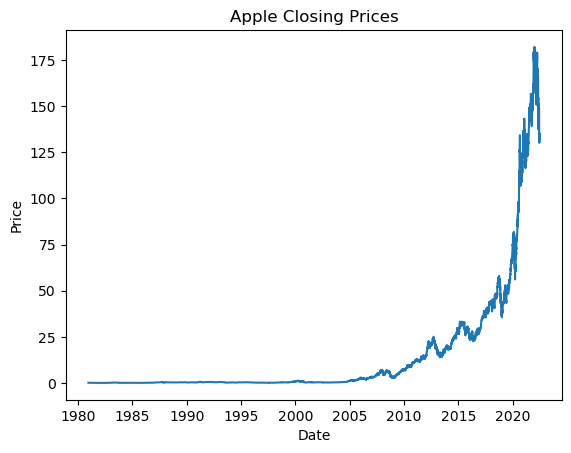

In [244]:
# plot the data
plt.plot(data['Close'])
plt.title('Apple Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')

Now, we can plot our training and testing data. We will be training on the data from 2010-2020 and test our model on the year 2021. 

Text(0.5, 1.0, 'Training and Testing Data')

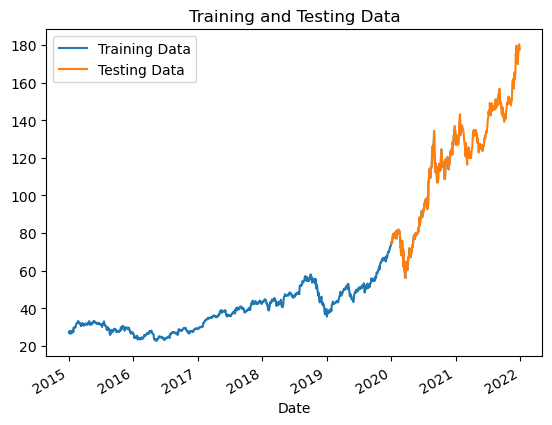

In [245]:
# plot training and testing data
data['Close']['2015':'2020'].plot(legend = True)
data['Close']['2020':'2021'].plot(legend = True)
plt.legend(['Training Data', 'Testing Data'])
plt.title('Training and Testing Data')

In [246]:
data.reset_index()

,Date,Close
0,1980-12-12,0.128348
1,1980-12-15,0.121652
2,1980-12-16,0.112723
3,1980-12-17,0.115513
4,1980-12-18,0.118862
...,...,...
10463,2022-06-13,131.880005
10464,2022-06-14,132.759995
10465,2022-06-15,135.429993
10466,2022-06-16,130.059998


Start our data at 2010 prices and exclude the closing prices from 2022 because that will be the last bit of data that we will test on. We will first want to test our data on the year 2021 so we will set up the training data to be from 2010-2020 and test on the year 2021. Then, we will test on the year 2022. 

In [247]:
# how many closing prices
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10468 entries, 1980-12-12 to 2022-06-17
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   10468 non-null  float64
dtypes: float64(1)
memory usage: 421.6 KB


In [249]:
# work with data past 2010 up until 2022.
data = data.loc['2015':'2021']

In [250]:
# first 5 records
data.head()

,Close
Date,
2015-01-02,27.332500
2015-01-05,26.562500
2015-01-06,26.565001
2015-01-07,26.937500
2015-01-08,27.972500


In [251]:
# last 5 records
data.tail()

,Close
Date,
2021-12-27,180.330002
2021-12-28,179.289993
2021-12-29,179.380005
2021-12-30,178.199997
2021-12-31,177.570007


In [252]:
# chack for nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1763 entries, 2015-01-02 to 2021-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1763 non-null   float64
dtypes: float64(1)
memory usage: 27.5 KB


In [564]:
# find starting index of test data
data.index.get_loc('2021')

slice(1511, 1763, None)

This is the last index of our training set. This means we can slice our training set to be from the first index to the 2768 index.

In [563]:
# last index of training set. 
data.iloc[1510]

Close    132.690002
Name: 2020-12-31 00:00:00, dtype: float64

In [255]:
# starting index of our testing set
data.iloc[1511]

Close    129.410004
Name: 2021-01-04 00:00:00, dtype: float64

In [256]:
# last index of our testing set
data.iloc[1762]

Close    177.570007
Name: 2021-12-31 00:00:00, dtype: float64

In [257]:
# no longer need dates as the index
data.reset_index()['Close']

0        27.332500
1        26.562500
2        26.565001
3        26.937500
4        27.972500
           ...    
1758    180.330002
1759    179.289993
1760    179.380005
1761    178.199997
1762    177.570007
Name: Close, Length: 1763, dtype: float64

In [258]:
# convert our data to a numpy array
dataset = data.values

In [259]:
# change type to float32
dataset = dataset.astype('float32')

In [260]:
# make sure it is an array
dataset

array([[ 27.3325],
       [ 26.5625],
       [ 26.565 ],
       ...,
       [179.38  ],
       [178.2   ],
       [177.57  ]], dtype=float32)

In [261]:
# view shape
dataset.shape

(1763, 1)

##### Scale the Data

In [262]:
# import library
from sklearn.preprocessing import MinMaxScaler

In [263]:
# create object
scaler = MinMaxScaler(feature_range=(0,1))

# fit and transform to our data
dataset = scaler.fit_transform(dataset)

In [264]:
# check min and max
print(f'Our min is : {dataset.min()}.')
print(f'Our max is : {dataset.max()}.')

Our min is : 0.0.
Our max is : 1.0000001192092896.


In [265]:
# verify the numbers are between 0 and 1
print(dataset)

[[0.03009605]
 [0.02521476]
 [0.02523062]
 ...
 [0.9939776 ]
 [0.9864972 ]
 [0.9825035 ]]


##### Train/Test/Valid Partitions

This part of the process is different than what we have done in the past since we are working with **sequences** of data. This is also called a **time series** and the order of the inputs matters to us. When using train test splits in the past we often used sklearn to do this process for us but in the case of our stock prices we do not want the splits to be random portions of the data. We have to be sure that our data are staying in their correct order for our neural network to learn from. This is because **time series** data are dependent on eachother. In the cases of classification or linear regression our data was dependent on the features such as a day of the week, but in our case the data is going to be dependent on the output from the previous date.

In [266]:
# set up training and testing data
train_data = dataset[0:1511,:]
test_data = dataset[1511:, :1]

In [267]:
# len of training data from 2010-2020
len(train_data)

1511

In [269]:
# there are 252 trading days a year so this seems correct.
len(test_data)

252

In [270]:
# first 5 training
train_data[:5]

array([[0.03009605],
       [0.02521476],
       [0.02523062],
       [0.02759202],
       [0.03415324]], dtype=float32)

##### Creating X and y

Now that our data is split into training and testing we have **2195** records used for training and **942** records used for testing. However, these are just arrays of single values. For our **LSTM** to operate using a memory system, we need to have **features** and **outputs** just as we do with other models such as linear regression. The **features** will be represented as our **X** values and the targets will be represented as our **y** output values just as we have done so many times before. To set up this data in this fashion we need to declare a **time step**, or a window, that we will be using to create our independent features to predict our dependent features. For example, if we use a time step of 3 we will be using the previous 3 closing prices as X features for each y outputs. I have created this simple graph in excel that shows how the data will be changing from an array to **X_train** and **y_train** values. As we can see in the image, our data is changing from an array of 5 values into two records of **X_train** values consisting of the three previous days and two **y_train** values that consist of the output on the given day. Put simply, our time step is the amount of previous data we want to use to make our decision on today's closing price which will be our target value.

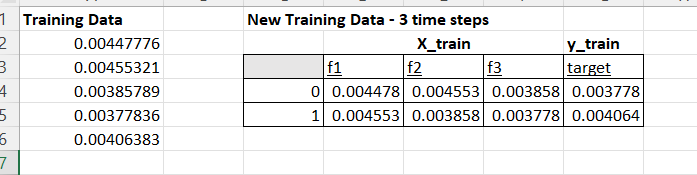

In [271]:
# create a function for time steps
def time_series(dataset, time_step):
    
    # create empty lists that we will fill
    X = []
    y = []
    
    for i in range(len(dataset) - time_step - 1):
        
        # start:stop - does not include last index
        window = dataset[i:(i + time_step), 0]
        
        # add window to our X values - stops 1 before stop index
        X.append(window)
        
        # append the last digit - does not use index just uses time step number (such as 3)
        y.append(dataset[i + time_step, 0])
    
    return np.array(X), np.array(y)
        
    

In [272]:
# we will use a time step of 60
time_step = 60

# create X_train X_test y_train y_test
X_train, y_train = time_series(train_data, time_step)
X_test, y_test = time_series(test_data, time_step)

In [273]:
# now we can see the features we created (time steps used to "look back" on)
X_train

array([[0.03009605, 0.02521476, 0.02523062, ..., 0.05372596, 0.05215697,
        0.05710167],
       [0.02521476, 0.02523062, 0.02759202, ..., 0.05215697, 0.05710167,
        0.05402708],
       [0.02523062, 0.02759202, 0.03415324, ..., 0.05710167, 0.05402708,
        0.05374181],
       ...,
       [0.597198  , 0.57329863, 0.5953596 , ..., 0.69285876, 0.68702656,
        0.6934293 ],
       [0.57329863, 0.5953596 , 0.5741862 , ..., 0.68702656, 0.6934293 ,
        0.723351  ],
       [0.5953596 , 0.5741862 , 0.5863577 , ..., 0.6934293 , 0.723351  ,
        0.71181333]], dtype=float32)

In [274]:
# 60 features and 2708 observations
print(X_train.shape)

(1450, 60)


In [275]:
# created target variable
y_train

array([0.05402708, 0.05374181, 0.05543758, ..., 0.723351  , 0.71181333,
       0.70452315], dtype=float32)

In [276]:
# 2708 observations of just one value
print(y_train.shape)

(1450,)


Now, we have just one more preprocessing step. When working with our LSTM model it is expected to have a 3-dimensional shape consisting of [samples, time steps, features]. Our data is currently 2-dimensional with the shape consisting of [samples, features] so we can use reshape to add the time steps dimension. All we have to do is add a 1 as the third dimension.

In [277]:
# reshape data into 3 dimensions
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [278]:
# view new shape
X_train.shape

(1450, 60, 1)

In [279]:
# view test shape
X_test.shape

(191, 60, 1)

In [280]:
# RNN libraries 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, LSTM, Dense

In [281]:
# build the model
model = Sequential()

# first layer
model.add(LSTM(32, return_sequences= True, input_shape = (X_train.shape[1], 1)))

# second layer
model.add(LSTM(32, return_sequences = True))

# third layer
model.add(LSTM(16, return_sequences = True))

# fourth layer
model.add(LSTM(16))

# output layer
model.add(Dense(1))

# compile the model
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [282]:
# view summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 60, 32)            4352      
                                                                 
 lstm_13 (LSTM)              (None, 60, 32)            8320      
                                                                 
 lstm_14 (LSTM)              (None, 60, 16)            3136      
                                                                 
 lstm_15 (LSTM)              (None, 16)                2112      
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 17,937
Trainable params: 17,937
Non-trainable params: 0
_________________________________________________________________


In [283]:
# fit the model
model.fit(X_train, y_train, epochs = 75, verbose = 1)

Epoch 1/75
46/46 [==============================] - 11s 60ms/step - loss: 0.0084
Epoch 2/75
46/46 [==============================] - 3s 61ms/step - loss: 7.4549e-04
Epoch 3/75
46/46 [==============================] - 3s 60ms/step - loss: 6.7692e-04
Epoch 4/75
46/46 [==============================] - 3s 62ms/step - loss: 6.9925e-04
Epoch 5/75
46/46 [==============================] - 4s 79ms/step - loss: 6.3585e-04
Epoch 6/75
46/46 [==============================] - 4s 79ms/step - loss: 5.8319e-04
Epoch 7/75
46/46 [==============================] - 4s 84ms/step - loss: 5.2716e-04
Epoch 8/75
46/46 [==============================] - 4s 81ms/step - loss: 5.6255e-04
Epoch 9/75
46/46 [==============================] - 4s 78ms/step - loss: 5.1442e-04
Epoch 10/75
46/46 [==============================] - 4s 85ms/step - loss: 7.5409e-04
Epoch 11/75
46/46 [==============================] - 4s 79ms/step - loss: 6.0429e-04
Epoch 12/75
46/46 [==============================] - 4s 80ms/step - loss: 4.6

##### Predictions

In [284]:
# make predictions on training and testing data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

6/6 [==============================] - 0s 17ms/step


In [285]:
# predictions on training data
train_pred

array([[0.05402771],
       [0.05331524],
       [0.05280698],
       ...,
       [0.70124555],
       [0.7126648 ],
       [0.7205969 ]], dtype=float32)

In [286]:
# predictions on testing data
test_pred

array([[0.6502202 ],
       [0.6513672 ],
       [0.65566075],
       [0.665003  ],
       [0.6743604 ],
       [0.6821563 ],
       [0.69052255],
       [0.7013612 ],
       [0.70671076],
       [0.711635  ],
       [0.7117059 ],
       [0.7132664 ],
       [0.7160244 ],
       [0.71963584],
       [0.7192973 ],
       [0.7172255 ],
       [0.7129493 ],
       [0.71350026],
       [0.7180519 ],
       [0.72157353],
       [0.7205341 ],
       [0.7167835 ],
       [0.70972013],
       [0.7054323 ],
       [0.69642496],
       [0.68731195],
       [0.6854844 ],
       [0.6898452 ],
       [0.6888322 ],
       [0.6814347 ],
       [0.66794205],
       [0.6603777 ],
       [0.66506535],
       [0.6727687 ],
       [0.6744198 ],
       [0.67056715],
       [0.67057455],
       [0.6710836 ],
       [0.67374855],
       [0.67665625],
       [0.678311  ],
       [0.6758926 ],
       [0.6708637 ],
       [0.66637784],
       [0.6659598 ],
       [0.6657039 ],
       [0.6689836 ],
       [0.673

To make sense of our predictions, we have to scale them back to their original form for our error calculations. We do this by using inverse_transform to our scaler.

In [287]:
# Convert values back to original unscaled version
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

In [288]:
import math
from sklearn.metrics import mean_squared_error

In [289]:
# find rmse for training data
math.sqrt(mean_squared_error(y_train[0], train_pred[:,0]))

1.8810902816593538

In [290]:
# do the same for test data
math.sqrt(mean_squared_error(y_test[0], test_pred[:,0]))

4.590379010455707

To plot the code I have referenced Jason Browniee's work on LSTMs. In order to plot our predictions we have to shift our data because the LSTM will output the first prediction using the previous data. This means the predicted value at time t (first day) is actually the expected value for t+1 (tomorrow). 

Text(0.5, 1.0, 'Apple Stock with Training, Testing, and Actual')

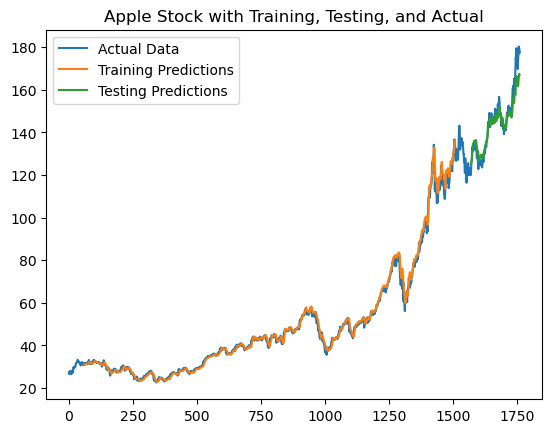

In [294]:
# create column of predictions
train_pred_plot = np.empty_like(dataset)
# make them all null for now
train_pred_plot[:, :] = np.nan
# fill with train_pred but shift them 
train_pred_plot[time_step: len(train_pred) + time_step, :] = train_pred

# create column of predictions
test_pred_plot = np.empty_like(dataset)
# make them all null for now
test_pred_plot[:, :] = np.nan
# fill with train_pred but shift them 
test_pred_plot[len(train_pred)+(time_step*2)+1:len(dataset)-1, :] = test_pred

# plot
plt.plot(scaler.inverse_transform(dataset), label = 'Actual Data')
plt.plot(train_pred_plot, label = 'Training Predictions')
plt.plot(test_pred_plot, label = 'Testing Predictions')
plt.legend()
plt.title('Apple Stock with Training, Testing, and Actual')

If we do not shift the data it appears the predictions are shifted to the right. 

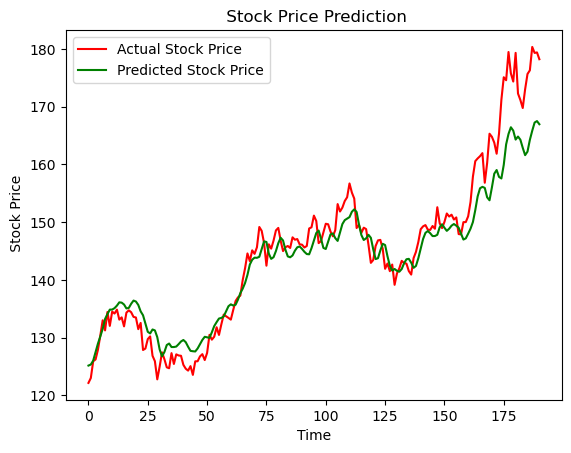

In [292]:
# plotting with no shift
plt.plot(y_test[0], color = 'red', label = 'Actual Stock Price')
plt.plot(test_pred, color = 'green', label = 'Predicted Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

##### Summary

We started our project by importing the data and preprocessing it so that we would only use the closing prices for our predictions. We preprocessed the data by first removing the entries before 2015 because I do not have a GPU and I do not believe the very small closing prices without much change would be beneficial to our model. This was a way for us to save time and still gather relatively accurate results. Following this we set up our training and testing data by locating the indicies that would belong to the years before 2021 as our training data and those that belong to the year 2021 as our testing data. Since **LSTM** expects our data to be an array, we changed our dataframe into an array by using .values. Also, since it is sensitive to a large range in values, we scaled our data using sklearn's MinMaxScaler. The last step in our preprocessing involved creating a dataset that would have our dependent X variables as the previous days and the dependent y variable as the closing price for the day we are on. We chose a time step of 60 previous days so we would have 60 X values, and 1 y value for every day in our data. We then added another dimension so that we can work with Keras.

The model that we created was not overly complex as we had the first layer with 32 units and cut the units in half with each passing layer. We use return_sequences = True for every layer but our final LSTM layer. After 75 epochs our model was done training and we made predictions using our model. To calculate the RMSE we used an inverse_transform of our data so that we would be working with the original closing prices instead of the scaled version that changed all closing prices to be between 0 and 1. We found that our testing data RMSE was larger than our training data RMSE but not by much and this is expected because our model does not get to see the testing data so it should perform a little worse. If the difference between our training and testing RMSE was very high I would conclude that the model was overfitting but I do not believe that is the case with our results. 

To plot our results we referenced Jason Browniee's article where the data is shifted because the model will use past data to predict the price for tomorrow. This allowed us to plot the predicted data right on top of the original data so that we were able to see the performance directly. 

Overall, we have a low RMSE score and we can see that our graph follows relatively closely to the actual stock prices, but is forecasting values that are lower than the actual stock prices. This does not mean that we do not have a well performing model since the stock market is very hard to predict. One of the reasons it is hard to predict is that it can be very volatile at times and in practice there are many more inputs that will be given to our model. Remember, we were only using the following closing prices to predict the stock price for the next day, so I would say that our results are very good. To make this model better we can try to introduce more epochs and layers and maybe use Dropout but I do not believe this model is overfitting at an alarming rate. One benefit of using LSTM vs other models such as ARIMA is that we do not have to worry about the trend of our data, but we could perhaps try to remove the trend in our data. In my opinion, this would not be necessary. 

##### Predicting 2022

To set up the data for multi-step predictions we need to change the way we set up our dataset. When we predicted the values for 2021 we set up the dataset to have 60 X-values and 1 y-value. Now, we will have 7 y-values as the output using the last 10 days as input. This portion of code was based off of Jason Brownlee's work with LSTM systems and Mikulski's article that I have referenced as well. I will try to explain each line of code to the best of my ability but the main thing to see here is that we are setting up our dataset differently so that we will be inputting 10 values for X but outputting 7 values for y instead of just 1 as we did before. The last 10 days will be the last 10 days of 2021 so we will first get this data and scale it properly. 

In [741]:
# Work with the closing prices
data21 = df[['Date', 'Close']]

In [742]:
# change date column to be the date time
data21['Date'] = pd.to_datetime(df['Date'])

C:\Users\ryans\AppData\Local\Temp\ipykernel_8260\3088539813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data21['Date'] = pd.to_datetime(df['Date'])


In [743]:
data21.set_index('Date', inplace = True)

In [744]:
data21.tail()

,Close
Date,
2022-06-13,131.880005
2022-06-14,132.759995
2022-06-15,135.429993
2022-06-16,130.059998
2022-06-17,131.559998


In [745]:
data21 = data21.loc['2020':]

In [746]:
data21

,Close
Date,
2020-01-02,75.087502
2020-01-03,74.357498
2020-01-06,74.949997
2020-01-07,74.597504
2020-01-08,75.797501
...,...
2022-06-13,131.880005
2022-06-14,132.759995
2022-06-15,135.429993


**Where does training end and testing begin**

In [748]:
# find starting index of test data
data21.index.get_loc('2022')

slice(505, 621, None)

In [749]:
# change to array
data21 = data21.values

In [750]:
data21 = data21.astype('float32')

In [751]:
# scale our data
data21 = scaler.fit_transform(data21)

In [752]:
data21[:5]

array([[0.15085277],
       [0.14505526],
       [0.14976075],
       [0.14696136],
       [0.15649137]], dtype=float32)

In [786]:
# set up training and testing data
train_data = data21[0:505,:]
test_data = data21[505:529, :1]

In [787]:
# create a data set with multiple predictions instead of 1
def build_training_data(dataset, history_size = 10, target_size = 7):
    
    # start 10 days prior end 7 days from the end of the data
    start_index = history_size
    end_index = len(dataset) - target_size

    X = []
    y = []

    for i in range(start_index, end_index):
        indices = range(i - history_size, i, 1)
        X.append(dataset[indices])
        y.append(dataset[i:i + target_size])

    X = np.array(X)
    y = np.array(y)
    return X, y


In [788]:
# train and test partitions
X_train, y_train = build_training_data(train_data)
X_test, y_test = build_training_data(test_data)

In [789]:
# shape of training data
X_train.shape

(488, 10, 1)

In [790]:
# shape of training data - notice the 7
y_train.shape

(488, 7, 1)

In [791]:
X_test.shape

(7, 10, 1)

In [792]:
y_test.shape

(7, 7, 1)

In [794]:
# reshape our data
X_train = X_train.reshape((-1, 10, 1))
y_train = y_train.reshape((-1, 7))

X_test = X_test.reshape((-1, 10, 1))
y_test = y_test.reshape((-1, 7))

In [797]:
# build a model with the dense layer being 7 instead of 1
model = Sequential()
model.add(LSTM(10, return_sequences=True, input_shape=(10, 1)))
model.add(LSTM(10))
model.add(Dense(7))
model.compile(optimizer='adam', loss='mse')

In [798]:
model.fit(X_train, y_train, epochs=50, verbose=1)

Epoch 1/50
16/16 [==============================] - 7s 17ms/step - loss: 0.2470
Epoch 2/50
16/16 [==============================] - 0s 17ms/step - loss: 0.1827
Epoch 3/50
16/16 [==============================] - 0s 17ms/step - loss: 0.1118
Epoch 4/50
16/16 [==============================] - 0s 18ms/step - loss: 0.0550
Epoch 5/50
16/16 [==============================] - 0s 18ms/step - loss: 0.0281
Epoch 6/50
16/16 [==============================] - 0s 17ms/step - loss: 0.0152
Epoch 7/50
16/16 [==============================] - 0s 17ms/step - loss: 0.0093
Epoch 8/50
16/16 [==============================] - 0s 17ms/step - loss: 0.0062
Epoch 9/50
16/16 [==============================] - 0s 18ms/step - loss: 0.0045
Epoch 10/50
16/16 [==============================] - 0s 17ms/step - loss: 0.0037
Epoch 11/50
16/16 [==============================] - 0s 17ms/step - loss: 0.0033
Epoch 12/50
16/16 [==============================] - 0s 18ms/step - loss: 0.0032
Epoch 13/50
16/16 [==================

In [801]:
# make predictions
test_pred = model.predict(X_test)

1/1 [==============================] - 0s 80ms/step


In [802]:
# scale back for rmse
test_pred = scaler.inverse_transform(test_pred)
y_test = scaler.inverse_transform(y_test)

In [803]:
# do the same for test data
math.sqrt(mean_squared_error(y_test, test_pred))

7.557758957454543

In [804]:
len(y_test)

7

In [805]:
len(test_pred)

7

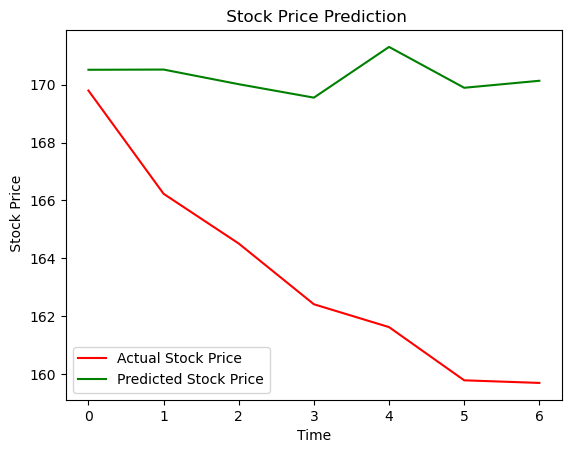

In [806]:
# plotting 
plt.plot(y_test[0], color = 'red', label = 'Actual Stock Price')
plt.plot(test_pred[0], color = 'green', label = 'Predicted Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [808]:
# predicted
test_pred[1]

array([169.85191, 169.91829, 169.37042, 169.0241 , 170.75932, 169.214  ,
       169.60527], dtype=float32)

In [810]:
# actual
y_test[1]

array([166.23, 164.51, 162.41, 161.62, 159.78, 159.69, 159.22],
      dtype=float32)

In [828]:
# final predictions in data frame form
predictions

,Actual,Predicted
0,166.229996,169.851913
1,164.509995,169.918289
2,162.410004,169.370422
3,161.619995,169.024094
4,159.779999,170.759323
5,159.690002,169.214005
6,159.220001,169.605270


##### Summary

Overall, this model is performing quite well. To be able to predict the stock market 7 days into the future is no small task and we were able to stay within about $10 with only a simple LSTM model. To make this model perform better we can use more epochs and more units. 

##### References

Brownlee, J. (2020). *How to Develop LSTM Models for Time Series Forecasting*. Deep Learning for Time Series. https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras and TensorFlow. Kiwisoft S.A.S.

Mikulski, B. (2019). *How to split a data frame into time-series for LSTM deep neural network*. Bartosz Mikulski - AI Consultant. https://mikulskibartosz.name/how-to-split-a-data-frame-into-time-series-for-lstm-deep-neural-network